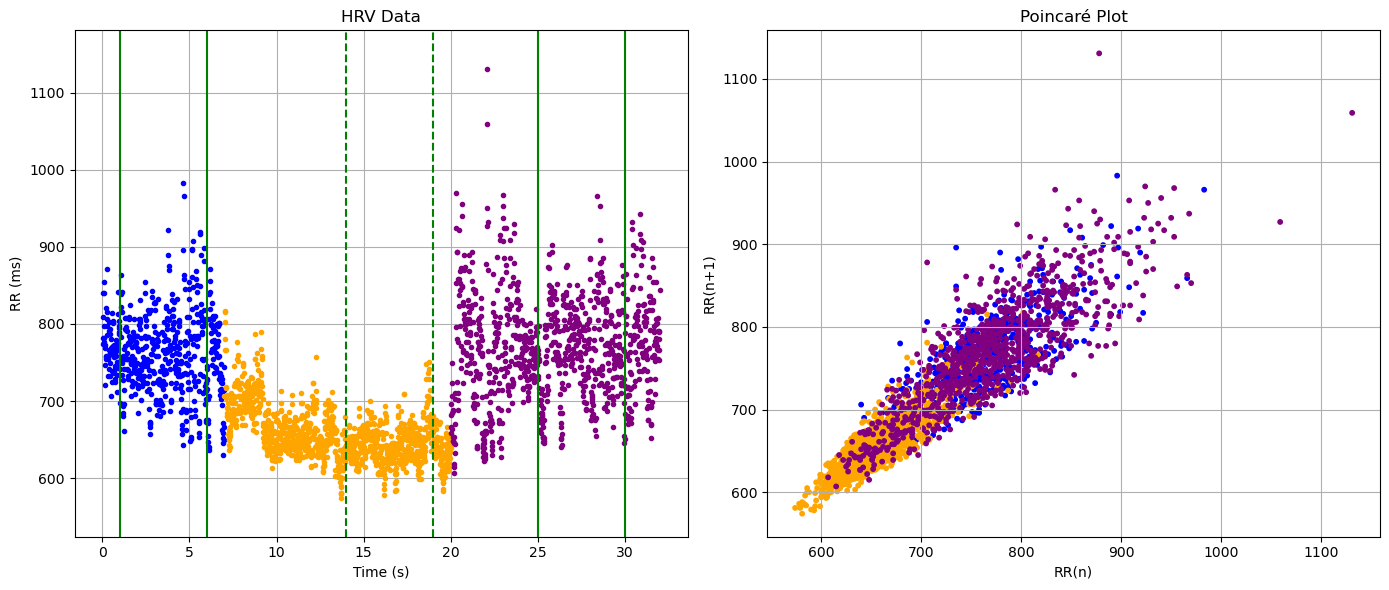


Statistics for each region:
Rest: Mean = 761.59, STD = 55.12,SD1 = 25.90, SD2 = 73.53
Exercise: Mean = 644.25, STD = 25.50,SD1 = 11.47, SD2 = 34.22
Recovery: Mean = 767.20, STD = 59.59,SD1 = 25.02, SD2 = 80.45


In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Get file path from command-line argument
file_path = r"AlmacenDatos/aca100wD.txt"

# Load data from the provided file
data = np.loadtxt(file_path)

# Timeline restrictions
Rest = 7        # 7 minutes of rest
Exercise = 20   # 11 minutes of exercise
Recovery = 32   # 12 minutes of recovery

# Filter out zero values
filtered_data = data[data[:, 1] != 0]
hrv_data = filtered_data[:, 1]
time_data = filtered_data[:, 0]

# Function to calculate SD1 and SD2
def calculate_sd1_sd2(series):
    n = len(series)
    mean_rr = np.mean(series)
    
    # Calculate SD1
    diff_rr = np.diff(series) / np.sqrt(2)
    sd1 = np.sqrt(np.sum(diff_rr**2) / (n - 1))
    
    # Calculate SD2
    sd2_term = (series[:-1] + series[1:] - 2 * mean_rr) / np.sqrt(2)
    sd2 = np.sqrt(np.sum(sd2_term**2) / (n - 1))
    
    return sd1, sd2

# Function to calculate RR mean, SD1, SD2, and standard deviation for each interval
def calculate_interval_statistics(time_data, hrv_data):
    intervals = {
        'Rest': (1, 6),
        'Exercise': (14, 19),
        'Recovery': (25, 30)
    }
    
    stats = {}
    
    for interval, (start, end) in intervals.items():
        mask = (time_data >= start) & (time_data < end)
        interval_data = hrv_data[mask]
        
        if len(interval_data) > 1:  # Ensure there's enough data for SD calculation
            rr_mean = np.mean(interval_data)
            sd1, sd2 = calculate_sd1_sd2(interval_data)
            rr_std = np.std(interval_data)  # Calculate standard deviation
            stats[interval] = {
                'Mean': rr_mean,
                'Standard Deviation': rr_std,
                'SD1': sd1,
                'SD2': sd2
            }
    
    return stats

# Function to plot the raw data with different colors for intervals
def plot_data(ax, time_data, hrv_data):
    # Define colors for different intervals
    colors = {'Rest': 'blue', 'Exercise': 'orange', 'Recovery': 'purple'}
    
    # Plot each interval with its corresponding color
    for i in range(len(time_data)):
        if time_data[i] < Rest:
            color = colors['Rest']
        elif time_data[i] < Exercise:
            color = colors['Exercise']
        elif time_data[i] < Recovery:
            color = colors['Recovery']
        else:
            continue
        
        ax.plot(time_data[i], hrv_data[i], '.', color=color)

    ax.set_ylim(hrv_data.min() - 50, hrv_data.max() + 50)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("RR (ms)")
    ax.set_title("HRV Data")
    ax.axvline(x=1, color='g', linestyle='-')
    ax.axvline(x=6, color='g', linestyle='-')
    ax.axvline(x=14, color='g', linestyle='--')
    ax.axvline(x=19, color='g', linestyle='--')
    ax.axvline(x=25, color='g', linestyle='-')
    ax.axvline(x=30, color='g', linestyle='-')
    ax.grid(True)

# Poincare plot function with color coding
def Poincare_plot(ax, hrv_data, time_data):
    x = []
    y = []
    colors = {'Rest': 'blue', 'Exercise': 'orange', 'Recovery': 'purple'}
    color_x = []

    for i in range(len(hrv_data) - 1):
        x.append(hrv_data[i])     # RR(n)
        y.append(hrv_data[i + 1]) # RR(n+1)
        # Determine color based on the time of RR(n) and RR(n+1)
        if time_data[i] < Rest:
            color_x.append(colors['Rest'])
        elif time_data[i] < Exercise:
            color_x.append(colors['Exercise'])
        elif time_data[i] < Recovery:
            color_x.append(colors['Recovery'])
        else:
            continue

    ax.scatter(x, y, c=color_x, s=10)  # Use c=color_x directly without cmap
    ax.set_xlabel("RR(n)")
    ax.set_ylabel("RR(n+1)")
    ax.set_title("Poincaré Plot")
    ax.grid(True)

# Calculate statistics
stats = calculate_interval_statistics(time_data, hrv_data)

# Create side-by-side plots using subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Call the plotting functions
plot_data(axes[0], time_data, hrv_data)  # Plot HRV data in the first subplot
Poincare_plot(axes[1], hrv_data, time_data)  # Plot Poincaré plot in the second subplot

plt.tight_layout()
plt.show()

# Print SD values for each region, including Standard Deviation
print("\nStatistics for each region:")
for key, values in stats.items():
    print(f"{key}: Mean = {values['Mean']:.2f}, STD = {values['Standard Deviation']:.2f},SD1 = {values['SD1']:.2f}, SD2 = {values['SD2']:.2f}")
